In [43]:
include("./src/solver.jl")
using PyPlot

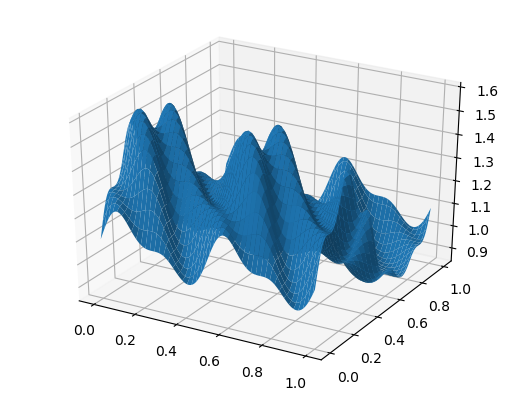

Norm of the distance between Du and f 0.00026017069887340706


In [35]:
#=
solver.jl:
- Julia version: 0.6.2
- Author: jerrymei
- Date: 2018-04-27
=#

k(x, y)=0.6 * sin(2 * pi * x) + 0.2 * sin(4 * pi * y) + 0.1 * sin(10 * pi * x + 8 * pi * y)
N_mesh=512

x=linspace(0,1 - 1 / N_mesh,N_mesh)
y=linspace(0,1 - 1 / N_mesh,N_mesh)
sol=zeros(N_mesh,N_mesh)
for i=1:N_mesh
    for j=1:N_mesh
        sol[i,j]=k(x[i],y[j])
    end
end

f=get_f(sol,1.)

u,err=solver(f,1.,1e-6)
figure(1)
plot_surface(linspace(0,1 - 1 / N_mesh,N_mesh),linspace(0,1 - 1 / N_mesh,N_mesh),u)
println("Norm of the distance between Du and f ", vecnorm(get_f(u,1.) - f)/vecnorm(f))

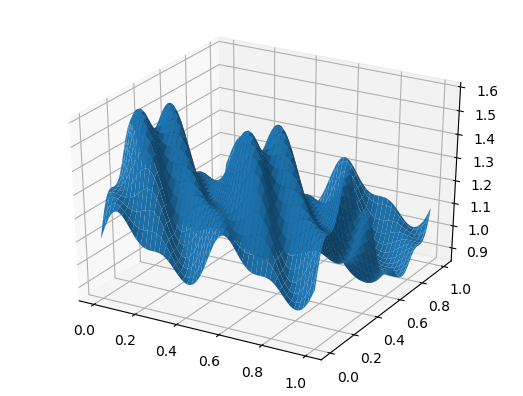

Norm of the distance between Du and f 4.572936235273176e-5


In [44]:
u,err=multigrid_solver(f,1.,1e-6)
figure(1)
plot_surface(linspace(0,1 - 1 / N_mesh,N_mesh),linspace(0,1 - 1 / N_mesh,N_mesh),u)
println("Norm of the distance between Du and f ", vecnorm(get_f(u,1.) - f)/vecnorm(f))

In [46]:
using BenchmarkTools

In [47]:
@benchmark u=first_multigrid_solver(f,1.,1e-6)

BenchmarkTools.Trial: 
  memory estimate:  32.64 MiB
  allocs estimate:  634
  --------------
  minimum time:     616.639 ms (0.66% GC)
  median time:      735.896 ms (0.53% GC)
  mean time:        747.050 ms (2.36% GC)
  maximum time:     961.882 ms (0.30% GC)
  --------------
  samples:          7
  evals/sample:     1

In [48]:
@benchmark u=first_solver(f,1.,1e-6)

0.003520643107699778
0.01919024374611767
0.004131020523171285
0.015616077138067268
0.0010627534556214516
0.00594054063617865
0.0006618869362831837
0.003476219750269695
0.000308295706699912
0.001666670557603941
0.00017227696391994074
0.0008925816357561828
8.878605422048498e-5
0.0004514015169037834
4.832298982293849e-5
0.00023537887217363264
2.5710783466701586e-5
0.00012074701260606032
1.3922269029574071e-5
6.246848080911403e-5
7.493343172042029e-6
3.216654876774307e-5
4.055342252731114e-6
1.6600853433298807e-5
2.190761511016696e-6
8.555362540764496e-6
1.1850148453962236e-6
4.4113749449740154e-6
6.403518538113995e-7
0.003520643107699778
0.01919024374611767
0.004131020523171285
0.015616077138067268
0.0010627534556214516
0.00594054063617865
0.0006618869362831837
0.003476219750269695
0.000308295706699912
0.001666670557603941
0.00017227696391994074
0.0008925816357561828
8.878605422048498e-5
0.0004514015169037834
4.832298982293849e-5
0.00023537887217363264
2.5710783466701586e-5
0.000120747012

BenchmarkTools.Trial: 
  memory estimate:  134.40 MiB
  allocs estimate:  8831
  --------------
  minimum time:     833.256 ms (1.28% GC)
  median time:      1.079 s (1.27% GC)
  mean time:        1.103 s (2.69% GC)
  maximum time:     1.434 s (0.96% GC)
  --------------
  samples:          5
  evals/sample:     1